Lab 1

Building a simple neural network using only Numpy and Pandas

In [ ]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
import random

In [ ]:
# load iris dataset as frame
iris = datasets.load_iris()
# for human-friendly presentation
pd.Series(iris)

,0
data,"[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [..."
target,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
frame,None
target_names,"[setosa, versicolor, virginica]"
DESCR,.. _iris_dataset:\n\nIris plants dataset\n----...
feature_names,"[sepal length (cm), sepal width (cm), petal le..."
filename,iris.csv
data_module,sklearn.datasets.data


In [ ]:
# read dataset using pandas (taken 'data' row)
df_iris = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
# show first 5 rows
df_iris.head() # X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# binary classification (0 or 1)
iris_target = np.where(iris.target == 0, 1, 0)  # if target == 0 then 1 (True), else 0 (False). Target zero is setosa

In [ ]:
# devide data to 80% train and 20% test sets using train_test_split function
X_train, X_test, y_train, y_test = train_test_split(df_iris, iris_target, random_state=11, test_size=0.2)

**Batch Gradient Descent**

In [ ]:
def batch_gradient_descent(X, y_actual, epoch, learning_rate = 0.1):

  """
  Adjust Weight and Bias using Gradient Descent
  w = w - learning_rate * gradient ( derivative(error)/ derivative(w) )
  b = b - learning_rate * gradient ( derivative(error)/ derivative(b) )

  BCE - Binary Cross-Entropy Loss (Log Loss)
  """

  # 4 features of iris data
  num_of_features = X.shape[1]

  # number of weight as number of features
  weight = np.ones(shape=num_of_features)

  # first value of bias
  bias = 0

  # number of rows in iris data
  total_samples = X.shape[0]

  # to store error values
  cost_list = []
  epoch_list = []

  for i in range(epoch):
    # target = w1 * sep.length + w2 * sep.width + w3 * pet.length + w4 * pet.width + bias
    y_predicted = np.dot(weight, X.T) + bias  # np.dot() for multiply matrices and X.T is transformed T

    # sigmoid
    y_pred_for_bce = 1 / (1 + np.exp(-y_predicted))

    # gradient for weight and bias
    weight_grad = -(2/total_samples) * (X.T.dot(y_actual - y_pred_for_bce))
    bias_grad = -(2/total_samples) * np.sum(y_actual - y_pred_for_bce)

    # adjust weights
    weight = weight - learning_rate * weight_grad
    bias = bias - learning_rate * bias_grad

    # BCE calculate
    bce = -np.mean(y_actual * np.log(y_pred_for_bce) + (1 - y_actual) * np.log(1 - y_pred_for_bce))

    if i % 10 == 0:
      # add values of bce to cost list
      cost_list.append(bce)
      epoch_list.append(i)

  return weight, bias, cost_list, epoch_list

In [ ]:
# X and y train set values
weight_train, bias_train, cost_list_train, epoch_list_train = batch_gradient_descent(X_train, y_train, 500)

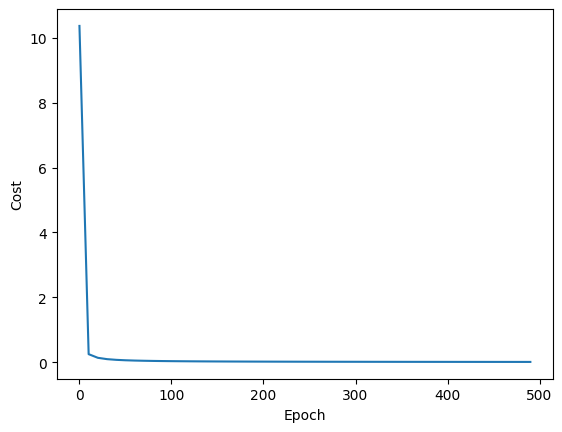

In [ ]:
# plot Binary Cross-Entropy of iris dataset (train set)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_train, cost_list_train)

In [ ]:
# X and y test set values
weight_test, bias_test, cost_list_test, epoch_list_test = batch_gradient_descent(X_test, y_test, 500)

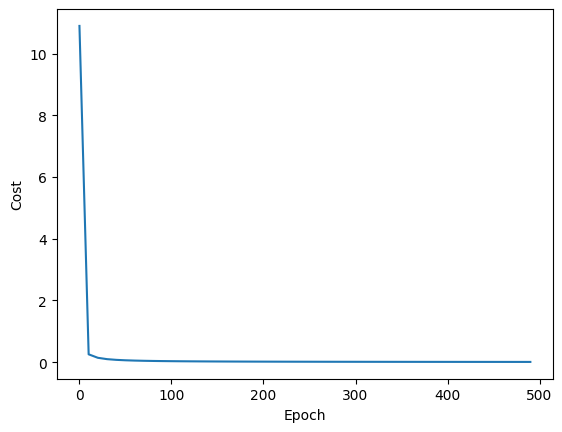

In [ ]:
# plot Binary Cross-Entropy of iris dataset (test set)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_test, cost_list_test)

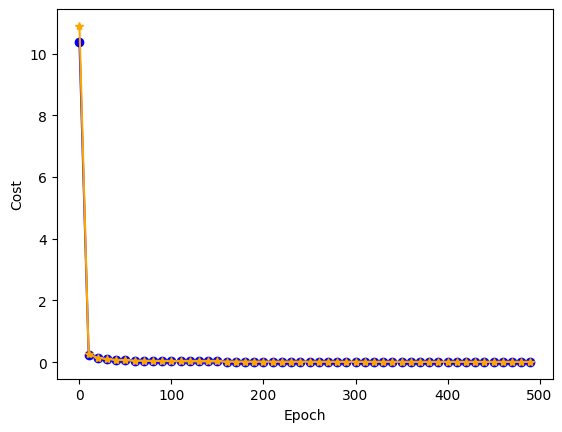

In [ ]:
# plot Binary Cross-Entropy of iris dataset (train and test set)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_train, cost_list_train, label="Train", color="blue", marker='o')
plt.plot(epoch_list_test, cost_list_test, label="Test", color="orange", marker='*')
plt.show()

Proc
1. Steady and Accurate Convergence to a Minimum
2. Easy Implementation
3. Excellent for Convex Functions

Cons
1. Unpractical for Larger Datasets
2. Slow to Converge
3. Difficult to Escape Local Minima

**Stochastic Gradient Descent**

In [ ]:
def stochastic_gradient_descent(X, y_actual, epoch, learning_rate = 0.1):

  """
  Adjust Weight and Bias using Gradient Descent
  w = w - learning_rate * gradient
  b = b - learning_rate * gradient

  BCE - Binary Cross-Entropy Loss (Log Loss)
  """

  # 4 features of iris data
  num_of_features = X.shape[1]

  # number of weight as number of features
  weight = np.ones(shape=num_of_features)

  # first value of bias
  bias = 0

  # number of rows in iris data
  total_samples = X.shape[0]

  # to store error values
  cost_list = []
  epoch_list = []

  for i in range(epoch):
    random_index = random.randint(0, total_samples - 1)
    sample_x = X.iloc[random_index].values
    sample_y = y_actual[random_index]

    # target = w1 * sep.length + w2 * sep.width + w3 * pet.length + w4 * pet.width + bias
    y_predicted = np.dot(weight, sample_x.T) + bias  # np.dot() for multiply matrices and sample_x.T is transformed T

    # sigmoid
    y_pred_for_bce = 1 / (1 + np.exp(-y_predicted))

    # gradient for weight and bias
    weight_grad = -(2/total_samples) * (sample_x.T.dot(sample_y - y_pred_for_bce))
    bias_grad = -(2/total_samples) * np.sum(sample_y - y_pred_for_bce)

    # adjust weights
    weight = weight - learning_rate * weight_grad
    bias = bias - learning_rate * bias_grad

    # BCE calculate
    bce = -np.mean(sample_y * np.log(y_pred_for_bce) + (1 - sample_y) * np.log(1 - y_pred_for_bce))

    if i % 100 == 0:
      # add values of bce to cost list
      cost_list.append(bce)
      epoch_list.append(i)

  return weight, bias, cost_list, epoch_list

In [ ]:
# X and y train set values from SGD
weight_train_sgd, bias_train_sgd, cost_list_train_sgd, epoch_list_train_sgd = stochastic_gradient_descent(X_train, y_train, 1500)
# X and y test set values from SGD
weight_test_sgd, bias_test_sgd, cost_list_test_sgd, epoch_list_test_sgd = stochastic_gradient_descent(X_test, y_test, 1500)

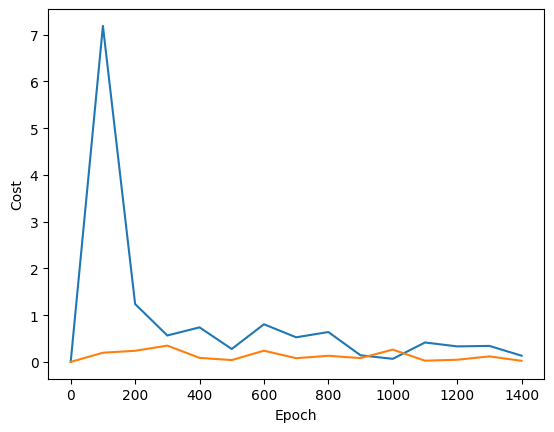

In [ ]:
# plot Binary Cross-Entropy of iris dataset (train and test set for SGD)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_train_sgd, cost_list_train_sgd)
plt.plot(epoch_list_test_sgd, cost_list_test_sgd)

Proc
1. Faster Convergence - Suitable for Larger Datasets
2. Able to Escape Local Minima
3. No Additional Hyperparameters

Cons
1. Less Accurate Convergence
2. More Complex Implementation
3. Non-Deterministic

**Mini-Batch Gradient Descent**

In [ ]:
def mini_batch_gradient_descent(X, y_actual, epoch, batch_size = 12, learning_rate = 0.1):

  """
  Adjust Weight and Bias using Gradient Descent
  w = w - learning_rate * gradient ( derivative(error)/ derivative(w) )
  b = b - learning_rate * gradient ( derivative(error)/ derivative(b) )

  BCE - Binary Cross-Entropy Loss (Log Loss)
  """

  # 4 features of iris data
  num_of_features = X.shape[1]

  # number of weight as number of features
  weight = np.ones(shape=num_of_features)

  # first value of bias
  bias = 0

  # number of rows in iris data
  total_samples = X.shape[0]

  # to store error values
  cost_list = []
  epoch_list = []

  for epoch_i in range(epoch):
    # random index from all sample
    random_index = np.random.permutation(total_samples)
    # random value for X and y
    sample_x = X.iloc[random_index].values
    sample_y = y_actual[random_index]

    for i in range(0, total_samples, batch_size):
      # take sample with batch size
      X_batch = sample_x[i:i+batch_size]
      y_batch = sample_y[i:i+batch_size]


      # target = w1 * sep.length + w2 * sep.width + w3 * pet.length + w4 * pet.width + bias
      y_predicted = np.dot(weight, X_batch.T) + bias  # np.dot() for multiply matrices and X_batch.T is transformed T

      # sigmoid
      y_pred_for_bce = 1 / (1 + np.exp(-y_predicted))

      # gradient for weight and bias
      weight_grad = X_batch.T.dot(y_pred_for_bce - y_batch) / batch_size
      bias_grad = np.sum(y_pred_for_bce - y_batch) / batch_size


      # adjust weights
      weight = weight - learning_rate * weight_grad
      bias = bias - learning_rate * bias_grad

      # BCE calculate
      bce = -np.mean(y_batch * np.log(y_pred_for_bce) + (1 - y_batch) * np.log(1 - y_pred_for_bce))

      if epoch_i % 10 == 0:
       # add values of bce to cost list
       cost_list.append(bce)
       epoch_list.append(epoch_i)

  return weight, bias, cost_list, epoch_list

In [ ]:
# X and y train set values for Mini-BGD
weight_train_mini, bias_train_mini, cost_list_train_mini, epoch_list_train_mini = mini_batch_gradient_descent(X_train, y_train, 1000)
# X and y test set values for Mini-BGD
weight_test_mini, bias_test_mini, cost_list_test_mini, epoch_list_test_mini = mini_batch_gradient_descent(X_test, y_test, 1000)

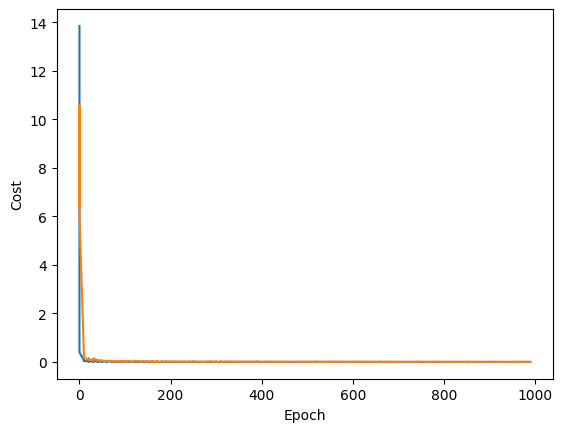

In [ ]:
# plot Binary Cross-Entropy of iris dataset (train and test set for Mini-BGD)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list_train_mini, cost_list_train_mini)
plt.plot(epoch_list_test_mini, cost_list_test_mini)

Proc
1. Provides Greater Accuacy than Stochastic Gradient Descent
2. Able to Handle Larger Datasets
3. Able to Escape Local Minima

Cons
1. More Complex Algorithm
2. Additional Hyperparameter
3. Less Accurate than Batch Gradient Descent

Conclusion

In this lab 1, we learned working with python libraries as numpy and pandas, creating single
layer Perceptron. In addition, we have worked with Gradient Descent methods (Batch GD,
Stochasti GD, Mini Batch GD) for finding the minimum of a function. For the solution, the
graph shows minimum costs, that means the optimization algorithm works properly.
Furthermore, in lab 1 was used the sigmoid function for converting linear solution into
probability and binary cross entropy (log loss) loss function for binary classification.


References

Buitinck, L., Louppe, G., Blondel, M., Pedregosa, F., Mueller, A., Grisel, O., ... & Varoquaux, G.
(2013). API design for machine learning software: experiences from the scikit-learn project.
arXiv preprint arXiv:1309.0238.

https://www.geeksforgeeks.org/deep-learning/mini-batch-gradient-descent-in-deep-learning/

https://medium.com/data-science/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

https://www.geeksforgeeks.org/machine-learning/difference-between-batch-gradient-descent-and-stochastic-gradient

https://www.geeksforgeeks.org/machine-learning/derivative-of-the-sigmoid-function